<a href="https://colab.research.google.com/github/Alvise84/Data_Analyst/blob/main/MarketInsight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Название проекта: **MarketInsight**
Описание:

MarketInsight — это инновационная платформа для анализа данных маркетплейса, предназначенная для предоставления глубоких инсайтов и аналитики, которые помогут бизнесу принимать обоснованные решения. Платформа объединяет мощные инструменты для предобработки данных, визуализации и анализа, чтобы пользователи могли легко отслеживать ключевые метрики, такие как средний чек клиента, распределение по статусам, динамику продаж, продажи по дням недели, GMV по категориям, долю отмен и рейтинг самых продаваемых товаров.

## Основные функции:

    Предобработка данных: Автоматическая очистка и подготовка данных для анализа.
    Визуализация данных: Интерактивные графики и диаграммы для наглядного представления данных.
    Анализ ключевых метрик: Отслеживание среднего чека, распределения по статусам, динамики продаж и других важных показателей.
    Категорийный анализ: Оценка GMV по категориям и доля отмен в каждой категории.
    Рейтинг товаров: Составление рейтинга самых продаваемых товаров для оптимизации ассортимента.
    Фильтрация данных: Возможность фильтрации данных по различным параметрам, таким как метод оплаты.


## Преимущества:

    Простота использования: Интуитивно понятный интерфейс для пользователей всех уровней.
    Точность данных: Высокая точность и надежность аналитических данных.
    Гибкость: Возможность настройки и фильтрации данных под конкретные нужды бизнеса.
    Визуализация: Наглядные и интерактивные графики для лучшего понимания данных.


## Загрузка данных

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/marketplace_dataframe.csv")

## Предобработка данных

In [ ]:
df.head()

,Unnamed: 0,ID товара,Статус,Дата создания,Артикул товара,Цена,Количество заказов,Итоговая сумма,ID транзакции,Категория,Сумма скидки,Метод оплаты,Дата оплаты,Дата начала обслуживания клиента,ID клиента
0,0,211131,завершен,01.07.2021,kreations_YI 06-L,1950,1,1950,100147443,Женская мода,0,наложенный платеж,01.07.2021,2021-7,1e4f1
1,1,211133,отменен,01.07.2021,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240,1,240,100147444,Красота и уход,0,наложенный платеж,01.07.2021,2021-7,1e4f2
2,2,211134,отменен,01.07.2021,Ego_UP0017-999-MR0,2450,1,2450,100147445,Женская мода,0,наложенный платеж,01.07.2021,2021-7,1e4f3
3,3,211135,завершен,01.07.2021,kcc_krone deal,360,1,60,100147446,Красота и уход,300,наложенный платеж,01.07.2021,2021-7,1e4f4
4,4,211136,заказ возвращен,01.07.2021,BK7010400AG,555,2,1110,100147447,Традиционные подарки,0,наложенный платеж,01.07.2021,2021-7,1e4f5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140468 entries, 0 to 140467
Data columns (total 15 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   Unnamed: 0                        140468 non-null  int64 
 1   ID товара                         140468 non-null  int64 
 2   Статус                            140468 non-null  object
 3   Дата создания                     140224 non-null  object
 4   Артикул товара                    140443 non-null  object
 5   Цена                              140468 non-null  int64 
 6   Количество заказов                140468 non-null  int64 
 7   Итоговая сумма                    140468 non-null  int64 
 8   ID транзакции                     140468 non-null  int64 
 9   Категория                         140468 non-null  object
 10  Сумма скидки                      140468 non-null  object
 11  Метод оплаты                      140270 non-null  object
 12  Да

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
ID товара,0
Статус,0
Дата создания,244
Артикул товара,25
Цена,0
Количество заказов,0
Итоговая сумма,0
ID транзакции,0
Категория,0


In [ ]:
df.describe(include='all')

,Unnamed: 0,ID товара,Статус,Дата создания,Артикул товара,Цена,Количество заказов,Итоговая сумма,ID транзакции,Категория,Сумма скидки,Метод оплаты,Дата оплаты,Дата начала обслуживания клиента,ID клиента
count,140468.000000,140468.000000,140468,140224,140443,140468.000000,140468.000000,1.404680e+05,1.404680e+05,140468,140468,140270,140468,140468,140468
unique,NaN,NaN,9,194,16832,NaN,NaN,NaN,NaN,16,3336,10,196,7,30952
top,NaN,NaN,завершен,25.11.2021,Al Muhafiz Sohan Halwa Almond,NaN,NaN,NaN,NaN,Мужская мода,0,наложенный платеж,25.11.2021,2021-11,1e4f35
freq,NaN,NaN,78075,15169,2068,NaN,NaN,NaN,NaN,26430,105348,80588,15169,48077,1877
mean,70233.500000,298547.506542,NaN,NaN,NaN,4150.771407,1.113008,5.174907e+03,1.002052e+08,NaN,NaN,NaN,NaN,NaN,NaN
std,40549.763144,50756.455590,NaN,NaN,NaN,11518.806845,1.409974,1.653977e+04,3.251946e+04,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,211131.000000,NaN,NaN,NaN,0.000000,1.000000,0.000000e+00,1.000013e+08,NaN,NaN,NaN,NaN,NaN,NaN
25%,35116.750000,254513.750000,NaN,NaN,NaN,299.000000,1.000000,3.600000e+02,1.001772e+08,NaN,NaN,NaN,NaN,NaN,NaN
50%,70233.500000,298941.500000,NaN,NaN,NaN,650.000000,1.000000,8.660000e+02,1.002062e+08,NaN,NaN,NaN,NaN,NaN,NaN
75%,105350.250000,342183.500000,NaN,NaN,NaN,1632.000000,1.000000,2.925000e+03,1.002338e+08,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(df.isnull().mean() *100)

Unnamed: 0                          0.000000
ID товара                           0.000000
Статус                              0.000000
Дата создания                       0.173705
Артикул товара                      0.017798
Цена                                0.000000
Количество заказов                  0.000000
Итоговая сумма                      0.000000
ID транзакции                       0.000000
Категория                           0.000000
Сумма скидки                        0.000000
Метод оплаты                        0.140957
Дата оплаты                         0.000000
Дата начала обслуживания клиента    0.000000
ID клиента                          0.000000
dtype: float64


In [ ]:
df = df.drop(columns=['Unnamed: 0'])

In [ ]:
df.head()

,ID товара,Статус,Дата создания,Артикул товара,Цена,Количество заказов,Итоговая сумма,ID транзакции,Категория,Сумма скидки,Метод оплаты,Дата оплаты,Дата начала обслуживания клиента,ID клиента
0,211131,завершен,01.07.2021,kreations_YI 06-L,1950,1,1950,100147443,Женская мода,0,наложенный платеж,01.07.2021,2021-7,1e4f1
1,211133,отменен,01.07.2021,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240,1,240,100147444,Красота и уход,0,наложенный платеж,01.07.2021,2021-7,1e4f2
2,211134,отменен,01.07.2021,Ego_UP0017-999-MR0,2450,1,2450,100147445,Женская мода,0,наложенный платеж,01.07.2021,2021-7,1e4f3
3,211135,завершен,01.07.2021,kcc_krone deal,360,1,60,100147446,Красота и уход,300,наложенный платеж,01.07.2021,2021-7,1e4f4
4,211136,заказ возвращен,01.07.2021,BK7010400AG,555,2,1110,100147447,Традиционные подарки,0,наложенный платеж,01.07.2021,2021-7,1e4f5


In [ ]:
df = df.dropna()

In [ ]:
print(df.duplicated().sum())

0


In [ ]:
df['Дата создания'] = pd.to_datetime(df['Дата создания'], format='%d.%m.%Y')
df['Дата оплаты'] = pd.to_datetime(df['Дата оплаты'], format='%d.%m.%Y')

## Период дат

In [ ]:
start_date = df['Дата создания'].min()
end_date = df['Дата создания'].max()
print(f"Период: с {start_date} по {end_date}")

Период: с 2021-07-01 00:00:00 по 2022-01-12 00:00:00


## Сколько уникальных клиентов/категорий/методов оплаты/статусов

In [ ]:
unique_clients = df['ID клиента'].nunique()
unique_categories = df['Категория'].nunique()
unique_payment_methods = df['Метод оплаты'].nunique()
unique_statuses = df['Статус'].nunique()

print(f"Уникальные клиенты: {unique_clients}")
print(f"Уникальные категории: {unique_categories}")
print(f"Уникальные методы оплаты: {unique_payment_methods}")
print(f"Уникальные статусы: {unique_statuses}")

Уникальные клиенты: 30874
Уникальные категории: 16
Уникальные методы оплаты: 10
Уникальные статусы: 9


In [ ]:
df['Категория'].unique()

array(['Женская мода', 'Красота и уход', 'Традиционные подарки',
       'Мобильные телефоны и планшеты', 'Бытовая техника', 'Дом и быт',
       'Мужская мода', 'Дети и младенцы', '\\N', 'Компьютерная техника',
       'Гипермаркет', 'Другое', 'Здоровье и спорт', 'Развлечения',
       'Книги', 'Школа и образование'], dtype=object)

In [ ]:
df['Метод оплаты'].unique()

array(['наложенный платеж', 'кредитная карта UBL', 'дебетовая карта Raif',
       'клиентский кредит', 'мобильный банкинг MCB',
       'маркетинговые расходы', 'наличные при доставке',
       'товарный кредит', 'платежная система Payaxis', 'ваучер'],
      dtype=object)

In [ ]:
df['Статус'].unique()

array(['завершен', 'отменен', 'заказ возвращен', 'получен',
       'оформлен возврат', 'закрыт', 'мошенничество', 'на удержании',
       'обмен'], dtype=object)

In [ ]:
# Фильтруем данные по методу оплаты 'маркетинговые расходы'
marketing_expenses_df = df[df['Метод оплаты'] == 'маркетинговые расходы']

# Отображаем отфильтрованные данные
marketing_expenses_df


,ID товара,Статус,Дата создания,Артикул товара,Цена,Количество заказов,Итоговая сумма,ID транзакции,Категория,Сумма скидки,Метод оплаты,Дата оплаты,Дата начала обслуживания клиента,ID клиента
325,211486,отменен,2021-07-01,Teenz_B-0541,3250,1,3250,100147698,Женская мода,0,маркетинговые расходы,2021-07-01,2021-7,1e4f104
357,211520,завершен,2021-07-01,Teenz_B-0541,3250,1,3250,100147728,Женская мода,0,маркетинговые расходы,2021-07-01,2021-7,1e4f112
358,211521,отменен,2021-07-01,sapil_Sapil Passion Women 200ML,375,1,375,100147729,Красота и уход,0,маркетинговые расходы,2021-07-01,2021-7,1e4f113
361,211524,завершен,2021-07-01,WE_ni72_parrot-veet-gift,1330,1,1330,100147732,\N,0,маркетинговые расходы,2021-07-01,2021-7,1e4f116
600,211800,отменен,2021-07-02,Eco Star_32U557,20104,1,20104,100147931,Развлечения,0,маркетинговые расходы,2021-07-02,2021-7,1e4f215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64943,292014,отменен,2021-11-20,FHM_Automan,15000,1,15000,100202479,Дом и быт,0,маркетинговые расходы,2021-11-20,2021-10,1e4f12560
65643,292948,отменен,2021-11-20,motif_MPT-215-Navy-36,550,1,550,100202491,Мужская мода,0,маркетинговые расходы,2021-11-20,2021-11,1e4f15979
66331,293838,завершен,2021-11-21,asimjofaeanew_6A,1999,1,1999,100203014,Женская мода,0,маркетинговые расходы,2021-11-21,2021-9,1e4f10186
67851,295936,отменен,2021-11-21,AC_75,699,1,889,100204300,Женская мода,0,маркетинговые расходы,2021-11-21,2021-9,1e4f8960


## Какой средний чек клиента

In [ ]:
average_check = df['Итоговая сумма'].mean()
print(f"Средний чек клиента: {average_check:.2f}")

Средний чек клиента: 5181.28


## Распределение по статусам (сколько завершено/отменено/возвращено)

In [ ]:
status_distribution = df['Статус'].value_counts()
print(status_distribution)

Статус
завершен            77810
отменен             41190
заказ возвращен     14732
получен              3059
оформлен возврат     2980
закрыт                213
мошенничество           7
на удержании            6
обмен                   4
Name: count, dtype: int64


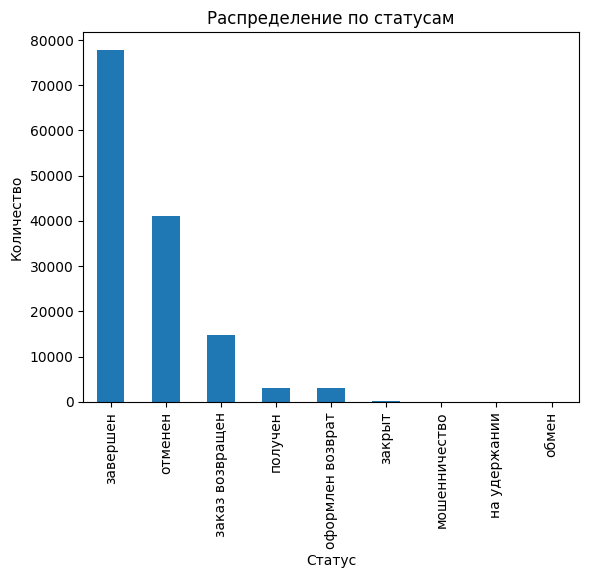

In [ ]:
# График
status_distribution.plot(kind='bar', title='Распределение по статусам')
plt.xlabel('Статус')
plt.ylabel('Количество')
plt.show()

## Динамика продаж (таблица + график)

    Дата создания  Итоговая сумма
0      2021-07-01          900364
1      2021-07-02         1374269
2      2021-07-03         2205826
3      2021-07-04         1094080
4      2021-07-05          388951
..            ...             ...
189    2022-01-08         3805495
190    2022-01-09         7498592
191    2022-01-10         5114376
192    2022-01-11        12931450
193    2022-01-12         3746533

[194 rows x 2 columns]


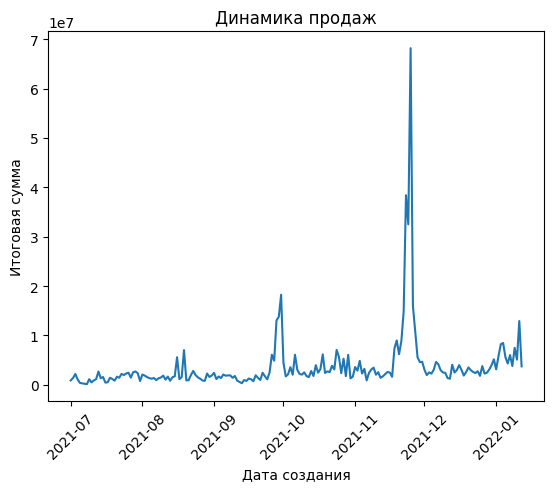

In [ ]:
sales_trend = df.groupby('Дата создания')['Итоговая сумма'].sum().reset_index()

# Таблица
print(sales_trend)

# График
plt.plot(sales_trend['Дата создания'], sales_trend['Итоговая сумма'])
plt.title('Динамика продаж')
plt.xlabel('Дата создания')
plt.ylabel('Итоговая сумма')
plt.xticks(rotation=45)
plt.show()


## Продажи по дню недели (график)

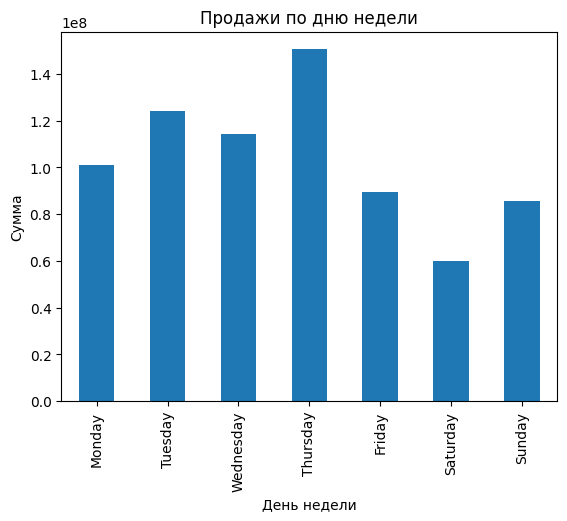

In [ ]:
df['День недели'] = df['Дата создания'].dt.day_name()
sales_by_weekday = df.groupby('День недели')['Итоговая сумма'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# График
sales_by_weekday.plot(kind='bar', title='Продажи по дню недели')
plt.xlabel('День недели')
plt.ylabel('Сумма')
plt.show()

## GMV по каждой категории (таблица + круговая диаграмма)

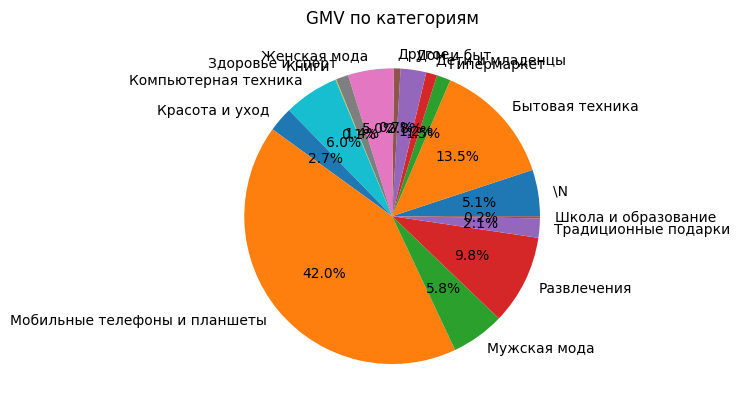

In [ ]:
gmv_by_category = df.groupby('Категория')['Итоговая сумма'].sum().reset_index()

# Круговая диаграмма
gmv_by_category.plot.pie(y='Итоговая сумма', labels=gmv_by_category['Категория'], autopct='%1.1f%%', title='GMV по категориям', legend=False)
plt.ylabel('')
plt.show()

In [ ]:
# Таблица
gmv_by_category

,Категория,Итоговая сумма
0,\N,36772543
1,Бытовая техника,97934753
2,Гипермаркет,10971331
3,Дети и младенцы,8749241
4,Дом и быт,20283158
5,Другое,5199769
6,Женская мода,36405325
7,Здоровье и спорт,9896442
8,Книги,644076
9,Компьютерная техника,43589022


## Доля отмен в каждой категории

Категория
\N                               0.396263
Бытовая техника                  0.595578
Гипермаркет                      0.422845
Дети и младенцы                  0.466993
Дом и быт                        0.431788
Другое                           0.381816
Женская мода                     0.370571
Здоровье и спорт                 0.367019
Книги                            0.121518
Компьютерная техника             0.755481
Красота и уход                   0.384144
Мобильные телефоны и планшеты    0.645026
Мужская мода                     0.333861
Развлечения                      0.674325
Традиционные подарки             0.368024
Школа и образование              0.208997
Name: Итоговая сумма, dtype: float64


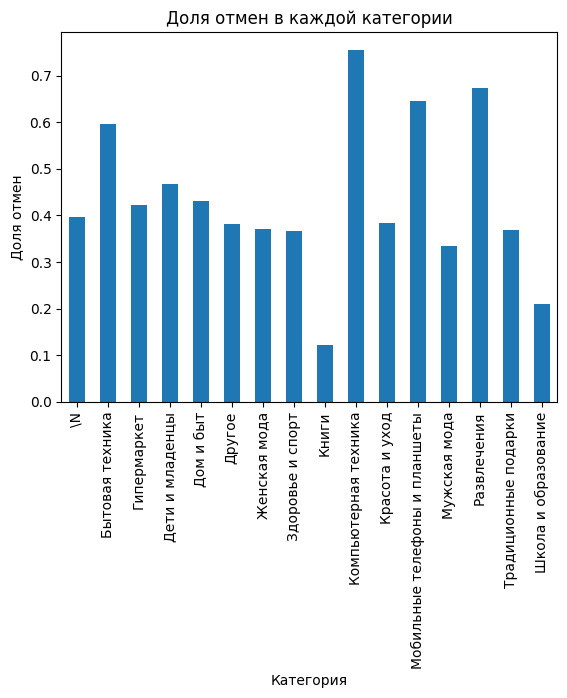

In [ ]:
cancellation_rate = df[df['Статус'] == 'отменен'].groupby('Категория')['Итоговая сумма'].sum() / df.groupby('Категория')['Итоговая сумма'].sum()

# Таблица
print(cancellation_rate)

# График
cancellation_rate.plot(kind='bar', title='Доля отмен в каждой категории')
plt.xlabel('Категория')
plt.ylabel('Доля отмен')
plt.show()

## Составляем рейтинг самых продаваемых товаров

                              Артикул товара  Итоговая сумма
13187           iphone-7-32gb-wof-Matt Black        23918960
13140                    infinix_Zero 4-Grey        20003592
14960        samsungGALAXY S-7 EDGE 32GB LTE        16937628
6658                          PS4_Slim-500GB        10104486
4487      Infinix Note 3-2GB-Nationwide-Grey        10002341
...                                      ...             ...
8799                   TM_TM/BRF-3-E/Grey -M               0
8712                          Stylo_L87363-8               0
5404               LALA_1000086899239-SMS-42               0
4248   Homage_Black Water Dispenser - HWD-42               0
14733  qzs_Red & Black Stylish Zipper Hoodie               0

[16781 rows x 2 columns]


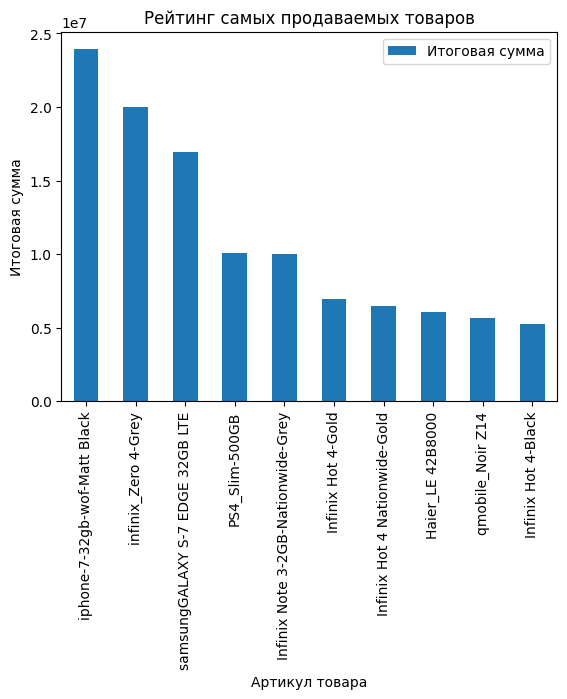

In [ ]:
top_selling_products = df.groupby('Артикул товара')['Итоговая сумма'].sum().reset_index().sort_values(by='Итоговая сумма', ascending=False)

# Таблица
print(top_selling_products)

# График
top_selling_products.head(10).plot(kind='bar', x='Артикул товара', y='Итоговая сумма', title='Рейтинг самых продаваемых товаров')
plt.xlabel('Артикул товара')
plt.ylabel('Итоговая сумма')
plt.show()

MarketInsight — это мощный инструмент для анализа данных маркетплейса, который поможет вашему бизнесу принимать обоснованные решения, оптимизировать продажи и улучшать клиентский опыт. С нашей платформой вы всегда будете в курсе всех ключевых метрик и трендов, что позволит вам оставаться на шаг впереди конкурентов.